**Group Members:** Joseph Lannan, Nuwan Yapa

Direct method

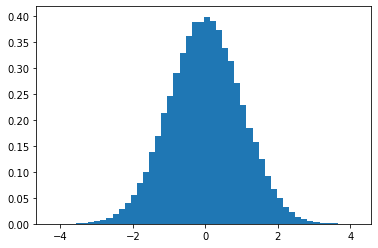

In [2]:
from random import uniform
from math import cos, pi, sqrt, log, exp
import matplotlib.pyplot as plt

def direct_gaussian():
  x1=uniform(0,1)
  x2=uniform(0,1)
  return cos(2*pi*x2)*sqrt(-2*log(x1))

x=[direct_gaussian() for i in range(100000)]
plt.hist(x, 50, density=True);

Inverse and Rejection methods:

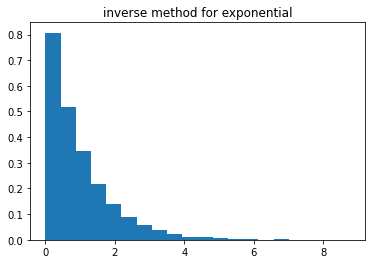

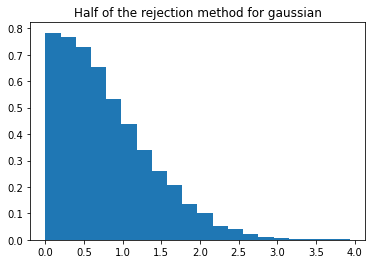

efficiency:  0.7642338555598013


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def invexp(n,lamb):
  return -np.log(np.random.random_sample(n)/lamb)*lamb

def rejectmethod(n,sigma):
  c = np.sqrt(2*np.exp(1)/np.pi)
  lamb = sigma
  ret = []
  i=0
  rejectnumber = 0
  while i < n:
    x = invexp(1,lamb)[0]
    P = 2*np.exp(-x**2/(2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)
    h = np.exp(-x/lamb)/lamb
    rejectrate = P/(c*h)
 #   print(rejectrate)
    if np.random.rand() < rejectrate:
      ret.append(x)
      i+=1
    else:
      rejectnumber += 1
  return [ret, n/(n+rejectnumber)]

n=10000
plt.figure()
plt.title("inverse method for exponential")
plt.hist(inverseexponential(n,1),bins=20,density=True)
plt.show()

plt.figure()
rej=rejectmethod(n,1)
plt.title("Half of the rejection method for gaussian")
#print("vals: ", rej[0])
plt.hist(rej[0],bins=20,density=True)
plt.show()
print("efficiency: ", rej[1])



Metroplis algorithm

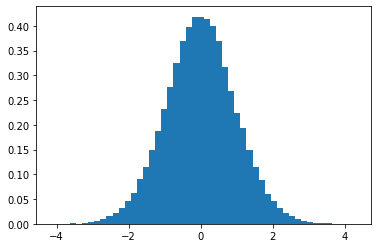

In [3]:
def gaussian_pdf(x):
  return 1/sqrt(2*pi)*exp(-x**2/2)

def metropolis_gaussian():
  delta=1
  l=1000
  x=uniform(-1,1)
  while 1:
    for i in range(l):
      xp=x+delta*uniform(-1,1)
      while not uniform(0,1)<min(gaussian_pdf(xp)/gaussian_pdf(x),1):
        xp=x+delta*uniform(-1,1)
      x=xp
      yield x

generator=metropolis_gaussian()
x=[next(generator) for i in range(100000)]
plt.hist(x, 50, density=True);